# Mapping the phase space of a jet

## 1-D Unfolding  of $\tau_{21}^{(1.)}$ measured with $E$-scheme recombination+exclusive $k_T$ axes and with WTA $k_T$ axes, with a purity&stability study for each observables' binning


#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [44]:
import ROOT
import array as array
import os
import glob
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
from root_numpy import *
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns
ROOT.TH1.SetDefaultSumw2()



In [45]:
%jsroot on

In [46]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print "2016 Single Muon dataset luminosity:%0.2f"%(lumi)

2016 Single Muon dataset luminosity:35.92


In [47]:
systs = ['Jmr', 'Jms', 'pileup', 'JesTotal', 'Lumi', 'lhaPDF', 'Jer']

uncert_colors = [ 4 ,  4 , ROOT.kCyan +1 ,2 ,      ROOT.kYellow+3,    ROOT.kMagenta ,  2 , ROOT.kBlack ,ROOT.kBlack ,    ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ]
uncert_lines = [ 5,8,7,3,    5,    6,8,1, 2, 4, 5, 1, 7, 8, 1, 7,7,4,4,5,2,1,3, 2, 4, 5, 1, 7, 8, 1]

#### Below the MC and Data events are read from ROOT trees which only contain events meeting the selection criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__ and thereafter in the nSubExtractor class

In [48]:
from nSubExtractor_old import nSubExtractor_old as nSubExtractor

### Loading datasets of $N$-subjettiness bases measured with WTA $k_T$

In [49]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="TTbar/2")
TTbarMG_dataset, TTbarMG_reco_nSub_basis, TTbarMG_gen_nSub_basis, TTbarMG_weights = a.sample_loader()

print TTbarMG_reco_nSub_basis.shape, TTbarMG_weights.shape

(6270, 21) (6270, 2)


In [50]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="TTbar/1")
TTbar_dataset, TTbar_reco_nSub_basis, TTbar_gen_nSub_basis, TTbar_weights  = a.sample_loader()

print TTbar_reco_nSub_basis.shape, TTbar_weights.shape

(43107, 21) (43107, 2)


In [51]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="ST/1")
ST1_dataset, ST1_reco_nSub_basis, ST1_gen_nSub_basis, ST1_weights  = a.sample_loader()
print ST1_reco_nSub_basis.shape, ST1_weights.shape

(900, 21) (900, 2)


In [52]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="ST/2")
ST2_dataset, ST2_reco_nSub_basis, ST2_gen_nSub_basis, ST2_weights  = a.sample_loader()
print ST2_reco_nSub_basis.shape, ST2_weights.shape

(1988, 21) (1988, 2)


In [53]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="ST/3")
ST3_dataset, ST3_reco_nSub_basis, ST3_gen_nSub_basis, ST3_weights  = a.sample_loader()
print ST3_reco_nSub_basis.shape, ST3_weights.shape

(594, 21) (594, 2)


In [54]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="ST/4")
ST4_dataset, ST4_reco_nSub_basis, ST4_gen_nSub_basis, ST4_weights  = a.sample_loader()
print ST4_reco_nSub_basis.shape, ST4_weights.shape

(617, 21) (617, 2)


In [55]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="ST/5")
ST5_dataset, ST5_reco_nSub_basis, ST5_gen_nSub_basis, ST5_weights  = a.sample_loader()
print ST5_reco_nSub_basis.shape, ST5_weights.shape

(69, 21) (69, 2)


In [56]:
a = nSubExtractor(isMC=1, axisdef="WTA_kT", sample="Wjets/2")
Wjets_dataset, Wjets_reco_nSub_basis, Wjets_gen_nSub_basis, Wjets_weights = a.sample_loader()
print Wjets_reco_nSub_basis.shape, Wjets_weights.shape

(207, 21) (207, 3)


In [57]:
a = nSubExtractor(isMC=0, axisdef="WTA_kT", sample="Data")
data_dataset, data_nSub_basis,  = a.sample_loader()
print data_nSub_basis.shape

(16482, 21)


In [58]:
weight_ST1 = (80.95*0.322*lumi*1000.)/(38811017.)*np.ones(ST1_weights.shape[0])*ST1_weights[:,0]*ST1_weights[:,1]*0.8
weight_ST2 = (0.322*136.02*lumi*1000.)/(66960888.)*np.ones(ST2_weights.shape[0])*ST2_weights[:,0]*ST2_weights[:,1]*0.8
weight_ST3 = (35.6*lumi*1000.)/(998276.)*np.ones(ST3_weights.shape[0])*ST3_weights[:,0]*ST3_weights[:,1]*0.8
weight_ST4 = (35.6*lumi*1000.)/(992024.)*np.ones(ST4_weights.shape[0])*ST4_weights[:,0]*ST4_weights[:,1]*0.8
weight_ST5 = (10.12*lumi*1000.)/(2989199.)*np.ones(ST5_weights.shape[0])*ST5_weights[:,0]*ST5_weights[:,1]*0.8
weight_TTbar = (831.76*lumi*1000.)/76915549.*np.ones(TTbar_weights.shape[0])*TTbar_weights[:,0]*TTbar_weights[:,1]*0.8
weight_Wjets = ((60781.5*lumi*1000.)*(Wjets_weights[:,2]/abs(Wjets_weights[:,2][0]))/158307515.0)*Wjets_weights[:,0]*Wjets_weights[:,1]*0.8 
weight_data = 1.0*np.ones(data_nSub_basis.shape[0])

#print lumi, weight_Wjets
#print TTbar_weights[:,0]

In [59]:
lenW = Wjets_reco_nSub_basis.shape[0]
lenST = ST1_reco_nSub_basis.shape[0]+ST1_reco_nSub_basis.shape[0]+ST2_reco_nSub_basis.shape[0]+ST4_reco_nSub_basis.shape[0]+ST5_reco_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [60]:
bkg_reco_nSub_basis = np.concatenate((Wjets_reco_nSub_basis, ST1_reco_nSub_basis, ST2_reco_nSub_basis, ST3_reco_nSub_basis, ST4_reco_nSub_basis, ST5_reco_nSub_basis))

In [61]:
lenW = Wjets_gen_nSub_basis.shape[0]
lenST = ST1_gen_nSub_basis.shape[0]+ST1_gen_nSub_basis.shape[0]+ST2_gen_nSub_basis.shape[0]+ST4_gen_nSub_basis.shape[0]+ST5_gen_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [62]:
bkg_gen_nSub_basis = np.concatenate((Wjets_gen_nSub_basis, ST1_gen_nSub_basis, ST2_gen_nSub_basis, ST3_gen_nSub_basis, ST4_gen_nSub_basis, ST5_gen_nSub_basis))

In [63]:
Wjets_gen_tau21 = Wjets_gen_nSub_basis[:,4]/Wjets_gen_nSub_basis[:,1]

ST1_gen_tau21 = ST1_gen_nSub_basis[:,4]/ST1_gen_nSub_basis[:,1]

ST2_gen_tau21 = ST2_gen_nSub_basis[:,4]/ST2_gen_nSub_basis[:,1]

ST3_gen_tau21 = ST3_gen_nSub_basis[:,4]/ST3_gen_nSub_basis[:,1]

ST4_gen_tau21 = ST4_gen_nSub_basis[:,4]/ST4_gen_nSub_basis[:,1]

ST5_gen_tau21 = ST5_gen_nSub_basis[:,4]/ST5_gen_nSub_basis[:,1]

TTbar_gen_tau21 = TTbar_gen_nSub_basis[:,4]/TTbar_gen_nSub_basis[:,1]

In [64]:
Wjets_reco_tau21 = Wjets_reco_nSub_basis[:,4]/Wjets_reco_nSub_basis[:,1]

ST1_reco_tau21 = ST1_reco_nSub_basis[:,4]/ST1_reco_nSub_basis[:,1]

ST2_reco_tau21 = ST2_reco_nSub_basis[:,4]/ST2_reco_nSub_basis[:,1]

ST3_reco_tau21 = ST3_reco_nSub_basis[:,4]/ST3_reco_nSub_basis[:,1]

ST4_reco_tau21 = ST4_reco_nSub_basis[:,4]/ST4_reco_nSub_basis[:,1]

ST5_reco_tau21 = ST5_reco_nSub_basis[:,4]/ST5_reco_nSub_basis[:,1]

TTbar_reco_tau21 = TTbar_reco_nSub_basis[:,4]/TTbar_reco_nSub_basis[:,1]

# Unfolding $\tau_{2,1}^{(1)}$ with background subtraction

In [65]:
MC_sig_reco_tau21 = TTbar_reco_tau21
MC_sig_gen_tau21 = TTbar_gen_tau21

MC_bkg_reco_tau21 = np.concatenate((ST1_reco_tau21,ST2_reco_tau21,ST3_reco_tau21,ST4_reco_tau21,ST5_reco_tau21,Wjets_reco_tau21))
MC_bkg_gen_tau21 = np.concatenate((ST1_gen_tau21,ST2_gen_tau21,ST3_gen_tau21,ST4_gen_tau21,ST5_gen_tau21,Wjets_gen_tau21))

data_tau21 = data_nSub_basis[:,4]/data_nSub_basis[:,1]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

print np.min(MC_sig_gen_tau21)
print np.min(MC_sig_reco_tau21)
print np.max(MC_sig_gen_tau21)
print np.max(MC_sig_reco_tau21), "\n"


print np.min(MC_bkg_gen_tau21)
print np.min(MC_bkg_reco_tau21)
print np.max(MC_bkg_gen_tau21)
print np.max(MC_bkg_reco_tau21), "\n"


print np.min(data_tau21)
print np.max(data_tau21)

0.03768753404598482
0.035832446145258635
0.9254738918178942
0.8701607885563205 

0.08263408413674796
0.07191420099054327
0.8891610030080723
0.8670939747005171 

0.0677043885388563
0.8498763137412436


### Get the response matrix and input 1D distributions for unfolding.

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [136]:
gen_bins1 = np.array([x for x in np.linspace(num=6, start=0., stop=0.8)])
gen_bins1 = np.concatenate(( gen_bins1, np.array([1.])))
print gen_bins1, gen_bins1.shape[0]

det_bins1 = np.array([x for x in np.linspace(num=11, start=0., stop=0.8)])
det_bins1 = np.concatenate((det_bins1, np.array([0.9,1.])))
print det_bins1, det_bins1.shape[0]

[0.   0.16 0.32 0.48 0.64 0.8  1.  ] 7
[0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64 0.72 0.8  0.9  1.  ] 13


In [137]:
gen_bins2 = np.array([x for x in np.linspace(num=9, start=0., stop=0.8)])
gen_bins2 = np.concatenate((gen_bins2, np.array([1.])))
print gen_bins2, gen_bins2.shape[0]

det_bins2 = np.array([x for x in np.linspace(num=17, start=0., stop=0.8)])
det_bins2 = np.concatenate((det_bins2, np.array([0.9, 1.])))

print det_bins2, det_bins2.shape[0]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1. ] 10
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.9  1.  ] 19


In [138]:
gen_bins3 = np.array([x for x in np.linspace(num=7, start=0.2, stop=0.8)])
gen_bins3 = np.concatenate((np.array([0.]), gen_bins3, np.array([1.])))
print gen_bins3, gen_bins3.shape[0]

det_bins3 = np.array([x for x in np.linspace(num=13, start=0.2, stop=0.8)])
det_bins3 = np.concatenate((np.array([0., 0.1]), det_bins3, np.array([0.9,1.])))
print det_bins3, det_bins3.shape[0]

[0.  0.2 0.3 0.4 0.5 0.6 0.7 0.8 1. ] 9
[0.   0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.9  1.  ] 17


In [139]:
gen_bins4 = [x for x in np.linspace(num=6, start=0.12, stop=0.8)]
gen_bins4 = np.concatenate((np.array([0.]), gen_bins4, np.array([0.93])))
print gen_bins4, gen_bins4.shape[0]

det_bins4 = np.array([x for x in np.linspace(num=11, start=0.12, stop=0.8)])
det_bins4 = np.concatenate((np.array([0., 0.06]),det_bins4, np.array([0.865, 0.93])))
print det_bins4, det_bins4.shape[0]

[0.    0.12  0.256 0.392 0.528 0.664 0.8   0.93 ] 8
[0.    0.06  0.12  0.188 0.256 0.324 0.392 0.46  0.528 0.596 0.664 0.732
 0.8   0.865 0.93 ] 15


In [140]:
gen_bins5 = [x for x in np.linspace(num=9, start=0.12, stop=0.8)]
gen_bins5 = np.concatenate((np.array([0.]), gen_bins5, np.array([0.93])))
print gen_bins5, gen_bins5.shape[0]

det_bins5 = np.array([x for x in np.linspace(num=17, start=0.12, stop=0.8)])
det_bins5 = np.concatenate((np.array([0., 0.06]),det_bins5, np.array([0.865, 0.93])))
print det_bins5, det_bins5.shape[0]

[0.    0.12  0.205 0.29  0.375 0.46  0.545 0.63  0.715 0.8   0.93 ] 11
[0.     0.06   0.12   0.1625 0.205  0.2475 0.29   0.3325 0.375  0.4175
 0.46   0.5025 0.545  0.5875 0.63   0.6725 0.715  0.7575 0.8    0.865
 0.93  ] 21


In [141]:
gen_bins6 = [x for x in np.linspace(num=11, start=0.12, stop=0.8)]
gen_bins6 = np.concatenate((np.array([0.]), gen_bins6, np.array([0.93])))
print gen_bins6, gen_bins6.shape[0]

det_bins6 = np.array([x for x in np.linspace(num=21, start=0.12, stop=0.8)])
det_bins6 = np.concatenate((np.array([0., 0.06]), det_bins6, np.array([0.865, 0.93])))
print det_bins6, det_bins6.shape[0]

[0.    0.12  0.188 0.256 0.324 0.392 0.46  0.528 0.596 0.664 0.732 0.8
 0.93 ] 13
[0.    0.06  0.12  0.154 0.188 0.222 0.256 0.29  0.324 0.358 0.392 0.426
 0.46  0.494 0.528 0.562 0.596 0.63  0.664 0.698 0.732 0.766 0.8   0.865
 0.93 ] 25


In [142]:
gen_bins7 = [x for x in np.linspace(num=6, start=0.12, stop=0.77)]
gen_bins7 = np.concatenate((np.array([0.]), gen_bins7, np.array([0.93])))
print gen_bins7, gen_bins7.shape[0]

det_bins7 = np.array([x for x in np.linspace(num=11, start=0.12, stop=0.77)])
det_bins7 = np.concatenate((np.array([0., 0.06]),det_bins7, np.array([0.85, 0.93])))
print det_bins7, det_bins7.shape[0]

[0.   0.12 0.25 0.38 0.51 0.64 0.77 0.93] 8
[0.    0.06  0.12  0.185 0.25  0.315 0.38  0.445 0.51  0.575 0.64  0.705
 0.77  0.85  0.93 ] 15


In [143]:
gen_bins8 = [x for x in np.linspace(num=9, start=0.12, stop=0.77)]
gen_bins8 = np.concatenate((np.array([0.]), gen_bins8, np.array([0.93])))
print gen_bins8, gen_bins8.shape[0]

det_bins8 = np.array([x for x in np.linspace(num=17, start=0.12, stop=0.77)])
det_bins8 = np.concatenate((np.array([0., 0.06]),det_bins8, np.array([0.85, 0.93])))
print det_bins8, det_bins8.shape[0]

[0.      0.12    0.20125 0.2825  0.36375 0.445   0.52625 0.6075  0.68875
 0.77    0.93   ] 11
[0.       0.06     0.12     0.160625 0.20125  0.241875 0.2825   0.323125
 0.36375  0.404375 0.445    0.485625 0.52625  0.566875 0.6075   0.648125
 0.68875  0.729375 0.77     0.85     0.93    ] 21


In [144]:
gen_bins9 = [x for x in np.linspace(num=11, start=0.12, stop=0.77)]
gen_bins9 = np.concatenate((np.array([0.]), gen_bins9, np.array([0.93])))
print gen_bins9, gen_bins9.shape[0]

det_bins9 = np.array([x for x in np.linspace(num=21, start=0.12, stop=0.77)])
det_bins9 = np.concatenate((np.array([0., 0.06]), det_bins9, np.array([0.85, 0.93])))
print det_bins9, det_bins9.shape[0]

[0.    0.12  0.185 0.25  0.315 0.38  0.445 0.51  0.575 0.64  0.705 0.77
 0.93 ] 13
[0.     0.06   0.12   0.1525 0.185  0.2175 0.25   0.2825 0.315  0.3475
 0.38   0.4125 0.445  0.4775 0.51   0.5425 0.575  0.6075 0.64   0.6725
 0.705  0.7375 0.77   0.85   0.93  ] 25


In [145]:
det_bins_arr = [det_bins1, det_bins2, det_bins3, det_bins4, det_bins5, det_bins6, det_bins7, det_bins8, det_bins9]
gen_bins_arr = [gen_bins1, gen_bins2, gen_bins3, gen_bins4, gen_bins5, gen_bins6, gen_bins7, gen_bins8, gen_bins9 ]

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [146]:
def fill_hists(gen_bins, det_bins, MC_sig_reco_tau21, MC_sig_gen_tau21, MC_bkg_reco_tau21, MC_bkg_gen_tau21, data_tau21):
        
    histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
    fill_hist(histMgenMC_bkg, MC_bkg_gen_tau21, weights=weights_MC_bkg)

    histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
    fill_hist(histMdetMC_bkg, MC_bkg_reco_tau21, weights=weights_MC_bkg)

    histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
    fill_hist(histMgenMC_sig, MC_sig_gen_tau21, weights=weights_MC_sig)

    histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
    fill_hist(histMdetMC_sig, MC_sig_reco_tau21, weights=weights_MC_sig)

    #histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
    #fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

    histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
    fill_hist(histMdetData, data_tau21)

    histMgenMC_bkg.SetTitle(";#tau_{2,1}^{1}(gen_bkg)")
    histMdetMC_bkg.SetTitle(";#tau_{2,1}^{1}(det_bkg)")
    histMgenMC_sig.SetTitle(";#tau_{2,1}^{1}(gen_sig)")
    histMdetMC_sig.SetTitle(";#tau_{2,1}^{1}(det_sig)")
    histMdetData.SetTitle(";#tau_{2,1}^{1}(data)")


    ### Fill response matrix

    response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
    hist2Dfill = np.zeros((MC_sig_reco_tau21.shape[0], 2))
    hist2Dfill[:,0] = MC_sig_reco_tau21.flatten()
    hist2Dfill[:,1] = MC_sig_gen_tau21.flatten()
    fill_hist(response, hist2Dfill, weights_MC_sig)
    response.SetTitle("Nominal Response Matrix;#tau_{2,1}^{1}(det_sig);#tau_{2,1}^{1}(gen_sig)")

    '''
    ##### Normalise the distributions, draw them and the response matrix.

    norm_genMC_bkg = histMgenMC_bkg.Integral()
    print norm_genMC_bkg

    norm_recoMC_bkg = histMdetMC_bkg.Integral()
    print norm_recoMC_bkg

    norm_genMC_sig = histMgenMC_sig.Integral()
    print norm_genMC_sig

    norm_recoMC_sig = histMdetMC_sig.Integral()
    print norm_recoMC_sig

    #norm_genData = histMgenData.Integral()
    #print norm_genData

    norm_detData = histMdetData.Integral()
    print norm_detData

    hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
    #hMC_gen_bkg.Scale(1./norm_genMC_bkg)

    hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
    #hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

    hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
    #hMC_gen_sig.Scale(1./norm_genMC_sig)

    hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
    #hMC_reco_sig.Scale(1./norm_recoMC_sig)

    hMC_data = ROOT.TH1D(histMdetData)
    #histMgenData.Scale(1./norm_genData)
    #histMdetData.Scale(1./norm_detData)

    histMgenMC_bkg.Scale(1./norm_genMC_bkg)
    histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
    histMgenMC_sig.Scale(1./norm_genMC_sig)
    histMdetMC_sig.Scale(1./norm_recoMC_sig)

    #histMgenData.Scale(1./norm_genData)
    histMdetData.Scale(1./norm_detData)
    '''
    
    return histMgenMC_bkg, histMdetMC_bkg, histMgenMC_sig, histMdetMC_sig, histMdetData, response

### Purity and Stability calculation

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [147]:
def purity_stability_calc(gen_bins, MC_sig_gen_tau21, det_bins, MC_sig_reco_tau21, verbose=True ):
    
    purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))
    stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))
    efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))

    gen_arr = MC_sig_gen_tau21[:]
    gen_bin_index = np.digitize(gen_arr, gen_bins)
    if verbose: print gen_bin_index
    
    det_arr = MC_sig_reco_tau21[:]
    det_bin_index = np.digitize(det_arr, gen_bins)
    det_bin_index2 = np.digitize(det_arr, det_bins)
    
    ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
    ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
    ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

    ### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
    ### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
    
    for i in xrange(0, gen_bins.shape[0]-1):

        #print i+1
        print "Setting contents for P, S, eff. histos"
        for k in xrange(0, gen_bin_index.shape[0]):

            if gen_bin_index[k]==i+1: 
                ngen_detanywhere[i]+=1 #stability denominator
                if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1

        ngen_detanywhere.append(0.)
        ndet_pergenbin.append(0.)

        for k in xrange(0, det_bin_index.shape[0]):

            if det_bin_index[k]==i+1: 
                ndet_genanywhere[i]+=1 #purity denominator

        ndet_genanywhere.append(0.)

        if verbose: print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
        purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
        stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
        efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)


    ndet_pergenbin = np.array(ndet_pergenbin)
    ndet_genanywhere = np.array(ndet_genanywhere)
    ngen_detanywhere = np.array(ngen_detanywhere)

    try:
        if verbose:print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
        if verbose: print ndet_pergenbin,"\n"
        if verbose: print ndet_genanywhere,"\n"
        purity_arr = ndet_pergenbin/ndet_genanywhere
        if verbose:print "Purity array:", purity_arr[:-1], "\n"

        if verbose: print ndet_pergenbin,"\n"
        if verbose: print ngen_detanywhere,"\n"
        stability_arr = ndet_pergenbin/ngen_detanywhere
        if verbose:print "Stability array:", stability_arr[:-1], "\n"

        if verbose:print "+++++Efficiency+++++\n"
        efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
        if verbose:print "Efficiency array:", efficiency_arr[:-1]


        purity.SetLineColor(ROOT.kRed)
        purity.SetLineWidth(2)
        purity.SetLineStyle(2)
        purity.SetMinimum(0.)
        purity.SetMaximum(1.05)

        stability.SetLineColor(9)
        stability.SetLineWidth(2)
        stability.SetLineStyle(2)
        stability.SetMinimum(0.)
        stability.SetMaximum(1.05)
        stability.SetTitle("t#bar{t} 2016, W-selection ")
        

        return purity, stability
    except:
        print "didn't work, binning issues probably the cause"
        return -1,-1

### Unfolding 

In [148]:
def doUnfolding(response, histMdetData, histMdetMC_sig, histMdetMC_bkg, histMgenMC_sig):

    print 'getting tunfolder:'

    orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
    regMode = ROOT.TUnfoldDensity.kRegModeCurvature
    con = ROOT.TUnfoldDensity.kEConstraintNone
    mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
    errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
    #tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
    #tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

    tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
    tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

    print 'setting reco input'
    tunfolder_data.SetInput( histMdetData )
    tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

    print 'setting reco MC input'
    tunfolder_MC.SetInput( histMdetMC_sig )
    #tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

    unfolded_data = tunfolder_data.DoUnfold(0.)
    unfolded_data = tunfolder_data.GetOutput("unfolded_data")

    unfolded_MC = tunfolder_MC.DoUnfold(0.)
    unfolded_MC = tunfolder_MC.GetOutput("closure_unfolded_MC")


    unfolded_MC.SetMarkerStyle(2)
    unfolded_MC.SetMarkerColor(7)
    unfolded_MC.SetLineColor(7)
    unfolded_MC.SetLineWidth(1)
    #unfolded_MC.Rebin(2)

    unfolded_data.SetMarkerStyle(22)
    unfolded_data.SetMarkerColor(1)
    unfolded_data.SetLineColor(1)
    unfolded_data.SetLineWidth(2)
    #unfolded_data.Rebin(2)


    histMgenMC_sig.SetMarkerStyle(5)
    histMgenMC_sig.SetMarkerColor(2)
    histMgenMC_sig.SetLineColor(2)
    #histMgenMC_sig.Rebin(2)


    hs = ROOT.THStack("#tau_{2,1}^{WTA}", "#tau_{2,1}^{WTA}")
    #hs.Add
    #hs.SetMaximum(5500)
    hs.Add( unfolded_MC, "E")
    hs.Add( unfolded_data, "E ")
    #hs.Add(histMgenMC_sig, "E HIST")

    leg0 = ROOT.TLegend(0.45, 0.72, 0.95, 0.9)
    leg0.SetTextSize(9)
    leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
    #leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
    #leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
    leg0.AddEntry( unfolded_MC, "MC self-closure (ttbar Powheg)", 'p')
    leg0.SetLineColor(0)
    leg0.SetBorderSize(0)
    leg0.SetFillStyle(0)

    #hs.Draw("nostack")
    #leg0.Draw()
    
    return hs, leg0

Draw the variables at reco and gen level and for "data"

In [149]:
ROOT.gStyle.SetOptStat(0)

In [150]:
purities = []
stabilities = []
h_unfoldings = [] 
h_responses = []

h_purities = ROOT.THStack("purities","purities")
h_stabilities = ROOT.THStack("stabilities","stabilities")
legus = []

leg_p = ROOT.TLegend(0.75, 0.5, 0.9, 0.9)
leg_p.SetLineColor(0)
leg_p.SetBorderSize(0)
leg_p.SetFillStyle(0)

leg_s = ROOT.TLegend(0.75, 0.5, 0.9, 0.9)
leg_s.SetLineColor(0)
leg_s.SetBorderSize(0)
leg_s.SetFillStyle(0)

for i in xrange(len(det_bins_arr)):
    k=i
    gen_bins = gen_bins_arr[i]
    det_bins = det_bins_arr[i]
    
    histMgenMC_bkg, histMdetMC_bkg, histMgenMC_sig, histMdetMC_sig, histMdetData, response = fill_hists(gen_bins, det_bins,
                                                                                              MC_sig_reco_tau21, MC_sig_gen_tau21,
                                                                                              MC_bkg_reco_tau21, MC_bkg_gen_tau21,
                                                                                              data_tau21);
    response.SetTitle("Response Matrix #tau_{2,1}^{WTA} binning %d"%(i+1))
    h_responses.append(response)
    print "Gen-level bins %d"%i, gen_bins
    print "Detector-level bins %d"%i, det_bins
    '''
    c0 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
    histMgenMC_sig.Draw("e")
    histMdetMC_sig.SetLineColor(ROOT.kRed+i)
    histMdetMC_sig.Draw("e same")
    c0.Update()
    c0.Draw()
    c0.Print()
    
    
    c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
    histMgenMC_bkg.Draw("e")
    histMdetMC_bkg.SetLineColor(ROOT.kRed+i)
    histMdetMC_bkg.Draw("e same")
    c1.Update()
    c1.Draw()
    c1.Print()
    
    c2 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
    histMdetData.Draw("e ")
    c2.Update()
    c2.Draw()
    c2.Print()
    
    c3 = ROOT.TCanvas("cresponse1", "cresponse1")
    response.Draw("colz")
    c3.Update()
    c3.Draw()
    c3.Print()
    '''
    purity, stability = purity_stability_calc(gen_bins, MC_sig_gen_tau21, det_bins, MC_sig_reco_tau21, verbose=False );
    
    if k==9:
        k=ROOT.kGreen+9
    purity.SetTitle("purity %d"%(i+1))
    #purity.SetLineStyle(i)
    purity.SetLineColor(k+1)
    
    stability.SetTitle("stability %d"%(i+1))
    #stability.SetLineStyle(i)
    stability.SetLineColor(k+1)
    
    purities.append(purity)
    stabilities.append(stability)
    
    h_purities.Add(purity)
    h_stabilities.Add(stability)
    
    leg_s.AddEntry( stability, "bins%d"%(i+1))
    leg_p.AddEntry( purity, "bins%d"%(i+1))
    
    hu, legu = doUnfolding(response, histMdetData, histMdetMC_sig, histMdetMC_bkg, histMgenMC_sig)
    hu.SetTitle("#tau_{2,1}^{WTA} binning %d"%(i+1))
    h_unfoldings.append(hu)
    legus.append(legu)

Gen-level bins 0 [0.   0.16 0.32 0.48 0.64 0.8  1.  ]
Detector-level bins 0 [0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64 0.72 0.8  0.9  1.  ]
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
getting tunfolder:
setting reco input
setting reco MC input
Gen-level bins 1 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1. ]
Detector-level bins 1 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.9  1.  ]
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in divide



getting tunfolder:
setting reco input
setting reco MC input
Gen-level bins 2 [0.  0.2 0.3 0.4 0.5 0.6 0.7 0.8 1. ]
Detector-level bins 2 [0.   0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.9  1.  ]
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
getting tunfolder:
setting reco input
setting reco MC input
Gen-level bins 3 [0.    0.12  0.256 0.392 0.528 0.664 0.8   0.93 ]
Detector-level bins 3 [0.    0.06  0.12  0.188 0.256 0.324 0.392 0.46  0.528 0.596 0.664 0.732
 0.8   0.865 0.93 ]
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S, eff. histos
Setting contents for P, S

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 12 input bins and 6 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen_sig)[u

In [151]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar", )
#cpse.cd()
h_purities.Draw("nostack")
leg_p.Draw()
#cpse.Draw()
cpse.SaveAs("Purities_tau21_WTAkT_Wsel_powheg.png")
#cpse.Print()
#cpse.Delete()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar
Info in <TCanvas::Print>: png file Purities_tau21_WTAkT_Wsel_powheg.png has been created


In [152]:
cpse1 = ROOT.TCanvas("pse1_ttbar", "pse1_ttbar", )
h_stabilities.Draw("nostack")
leg_s.Draw()
#cpse1.Draw()
#cpse1.Draw()
cpse1.SaveAs("Stabilities_tau21_WTAkT_Wsel_powheg.png")
#cpse1.Print()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse1_ttbar
Info in <TCanvas::Print>: png file Stabilities_tau21_WTAkT_Wsel_powheg.png has been created


In [153]:
import time
#hs = []
c5 = ROOT.TCanvas('c5', 'c5', 1200, 1080)
c5.Divide(3,3)
for i in xrange(len(h_unfoldings)):
    c5.cd(i+1)
    h_unfoldings[i].Draw("nostack")
    legus[i].Draw()
    #time.sleep(1)

c5.Draw()
#time.sleep(2)
c5.SaveAs("Tau21_unfoldings_WTAkT_Wsel_powheg.png")
#time.sleep(5)
#c5.SaveAs("Tau21_unfoldings_WTAkT_Wsel_powheg.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file Tau21_unfoldings_WTAkT_Wsel_powheg.png has been created


In [154]:
c6 = ROOT.TCanvas('c6', 'c6',1200, 1080)
c6.Divide(3,3)
for i in xrange(len(h_responses)):
    c6.cd(i+1)
    h_responses[i].Draw("colz")
    
c6.Draw()
c6.SaveAs("Tau21_responses_WTAkT_Wsel_powheg.png")
#c6.SaveAs("Tau21_responses_WTAkT_Wsel_powheg.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file Tau21_responses_WTAkT_Wsel_powheg.png has been created


#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [116]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau21, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau21, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau21, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau21, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau21)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [117]:
histMgenMC_bkg.SetTitle(";#tau_{2,1}^{1}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{2,1}^{1}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{2,1}^{1}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{2,1}^{1}(det_sig)")

histMdetData.SetTitle(";#tau_{2,1}^{1}(data)")


Draw the variables at reco and gen level and for "data"

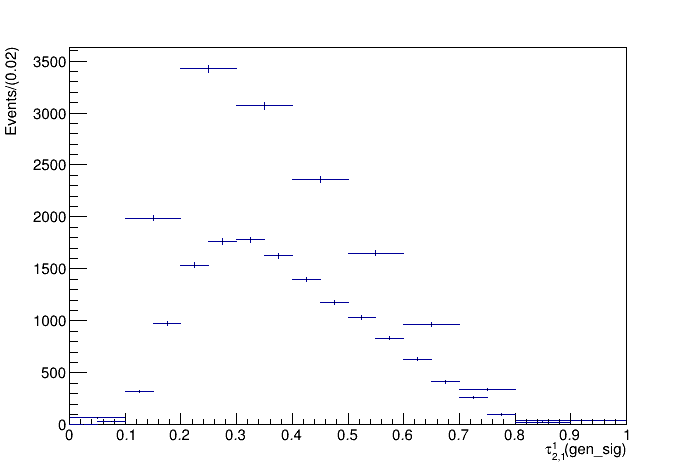

In [118]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

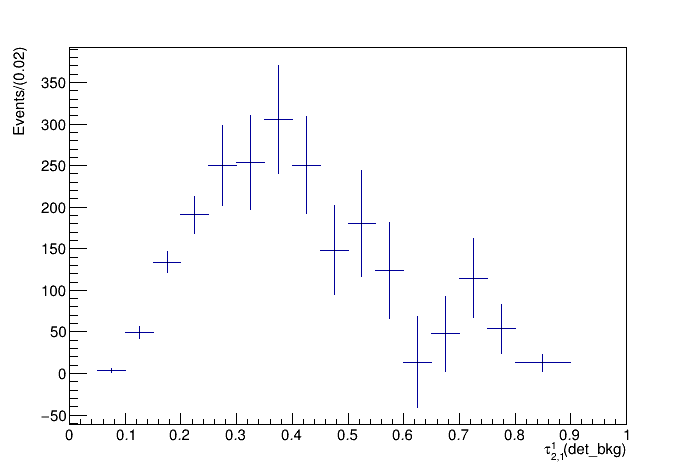

In [119]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
#histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e ")#same")
c1.Draw()

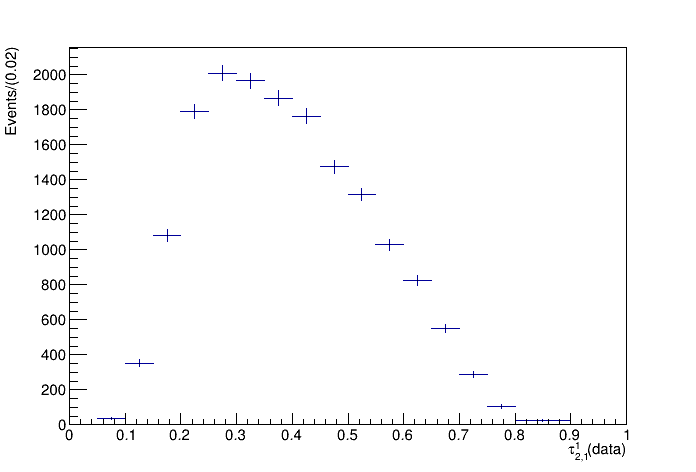

In [120]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [121]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau21.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau21.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau21.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{2,1}^{1}(det_sig);#tau_{2,1}^{1}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


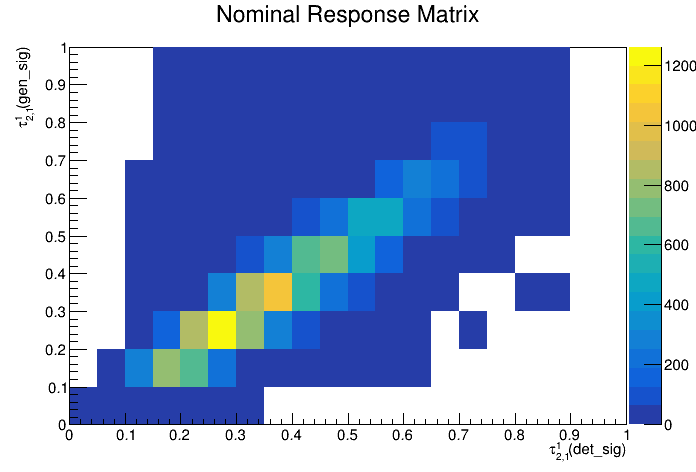

In [122]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [123]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [124]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.0555555555556 0.0
1 0.0 1.13855366366
2 0.05 31.8686623473
3 0.1 320.820579608
4 0.15 973.637842811
5 0.2 1536.56931639
6 0.25 1762.90423671
7 0.3 1778.91804168
8 0.35 1627.35501531
9 0.4 1398.61559374
10 0.45 1175.93516176
11 0.5 1033.44350862
12 0.55 833.107352791
13 0.6 629.565747628
14 0.65 413.954269312
15 0.7 260.065199272
16 0.75 98.2748507601
17 0.8 24.9636969043
18 0.9 0.0
0 -0.111111111111 0.0
1 0.0 66.6598241858
2 0.1 1988.14774258
3 0.2 3425.54497507
4 0.3 3067.65753957
5 0.4 2356.93771239
6 0.5 1650.17646724
7 0.6 964.956120006
8 0.7 342.196296693
9 0.8 38.8609515774


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cresponse1


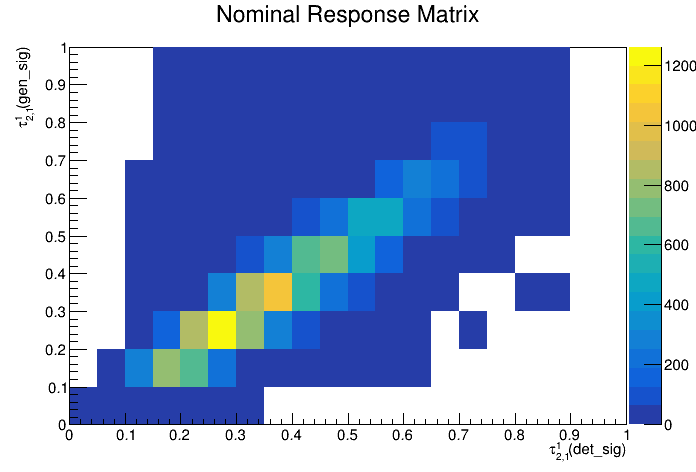

In [125]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [126]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))

Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: efficiency (Potential memory leak).


### With python

In [127]:
gen_arr = MC_sig_gen_tau21[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau21[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

###purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
###stability = # of evts generated and reconstructed in gen bin / # of evts reconstructed in gen bin i but generated anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    print ndet_pergenbin[i], ndet_genanywhere[i]
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

Setting contents for P, S, eff. histos, in bin 1
50.0 100.0
Setting contents for P, S, eff. histos, in bin 2
3281.0 4023.0
Setting contents for P, S, eff. histos, in bin 3
6454.0 10261.0
Setting contents for P, S, eff. histos, in bin 4
5801.0 10617.0
Setting contents for P, S, eff. histos, in bin 5
4215.0 7962.0
Setting contents for P, S, eff. histos, in bin 6
2972.0 5746.0
Setting contents for P, S, eff. histos, in bin 7
1701.0 3214.0
Setting contents for P, S, eff. histos, in bin 8
515.0 1109.0
Setting contents for P, S, eff. histos, in bin 9
17.0 75.0


+++++++++Pure and Stable! :)+++++++++++++


[  50. 3281. 6454. 5801. 4215. 2972. 1701.  515.   17.    0.] 

[  100.  4023. 10261. 10617.  7962.  5746.  3214.  1109.    75.     0.] 

Purity array: [0.5        0.81556053 0.62898353 0.54638787 0.5293896  0.51722938
 0.52924704 0.46438233 0.22666667] 


[  50. 3281. 6454. 5801. 4215. 2972. 1701.  515.   17.    0.] 

[  214.  6202. 10664.  9525.  7274.  5086.  2983.  1038.   121.     0.] 

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [128]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar


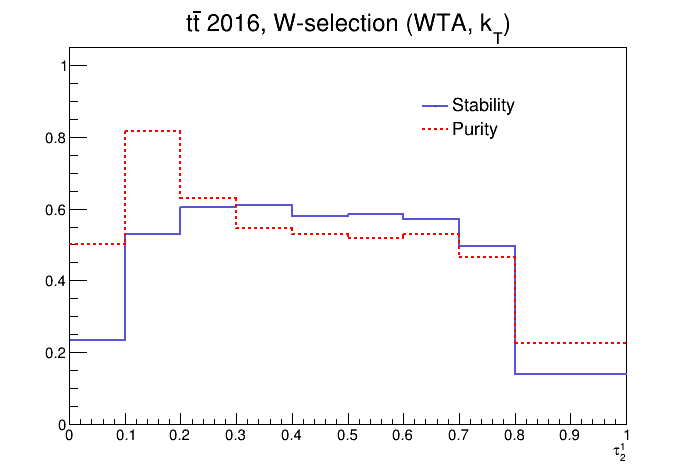

In [129]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection (WTA, k_{T})")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

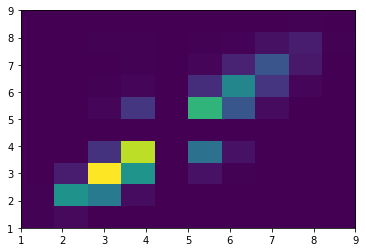

In [130]:
plt.hist2d(x=det_bin_index, y=gen_bin_index);

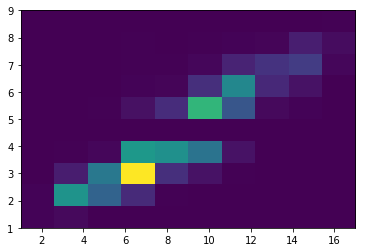

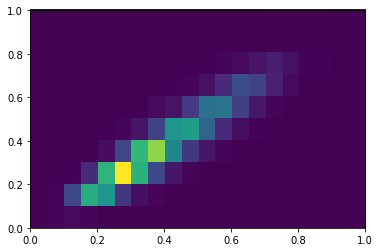

In [131]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index);
plt.show()
plt.hist2d(x=MC_sig_reco_tau21, y=MC_sig_gen_tau21, bins=[det_bins, gen_bins]);
plt.show()

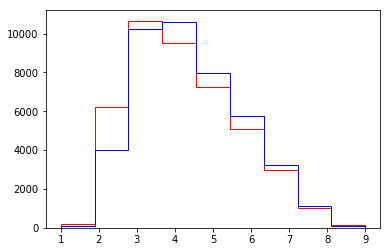

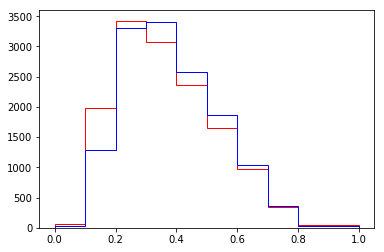

In [132]:
plt.hist(gen_bin_index, histtype='step', color='r', bins=gen_bins.shape[0]-1)
plt.hist(det_bin_index, histtype='step', color='b', bins=gen_bins.shape[0]-1)
plt.show()

plt.hist(MC_sig_gen_tau21, histtype='step', color='r', bins=gen_bins, weights=weights_MC_sig)
plt.hist(MC_sig_reco_tau21, histtype='step', color='b', bins=gen_bins, weights=weights_MC_sig)
plt.show()

### with root

In [199]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
Filling row index k=7 with elements (i,j)=(0,16)
Filling row index k=7 with elements (i,j)=(0,17)
Filling row index k=8 with elements (i,j)=(0,18)
Filling row index k=8 with elements (i,j)=(0,19)
0.0 0.

In [200]:
print diag
print tot_row
print diag/tot_row

[0.0, 0.0, 0.0, 0.7676682110315105, 0.7315248358684481, 0.0, 0.0, 0.0, 0.0]
[5380.97252295 3781.47252118  156.25428107   46.46869287    0.
    0.            0.            0.            0.        ]
[0.         0.         0.         0.01652012        inf        nan
        nan        nan        nan]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-121-dc72c7765764>, line 9)

### Unfolding 

In [133]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{2,1}^{1}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{2,1}^{1}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[U

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [134]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


Warning in <TUnfoldDensity::SetInput>: 2/18 input bins have zero error, and are ignored.


In [135]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


1

Warning in <TUnfoldDensity::SetInput>: One input bin has zero error, and is ignored.


In [136]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [137]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


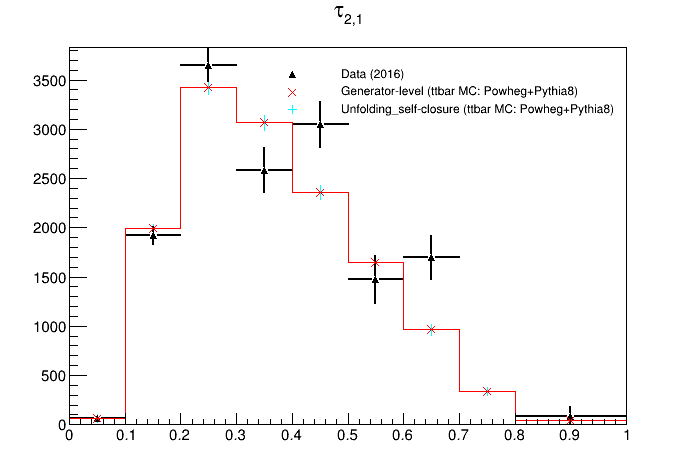

In [138]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{2,1}", "#tau_{2,1}")
#hs.Add
hs.SetMinimum(0)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.35, 0.75, 0.91, 0.86)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
#c5.SaveAs("Tau21_unfolding_Escheme_bkgsub.png")
#c5.SaveAs("Tau21_unfolding_Escheme_bkgsub.pdf")

In [139]:
ratio = ROOT.TH1D("","; #tau_{2,1}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{2,1}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
66.6598 	13.6269 	0.05 	0.0 1.0000 0.2168
1988.1477 	44.9180 	0.15 	0.1 1.0000 0.0262
3425.5450 	68.2074 	0.25 	0.2 1.0000 0.0223
3067.6575 	75.0540 	0.35 	0.3 1.0000 0.0267
2356.9377 	72.8467 	0.45 	0.4 1.0000 0.0332
1650.1765 	64.9248 	0.55 	0.5 1.0000 0.0420
964.9561 	53.5355 	0.65 	0.6 1.0000 0.0587
342.1963 	39.7714 	0.75 	0.7 1.0000 0.1207
38.8610 	25.9267 	0.9 	0.8 1.0000 0.6739


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file MC_SC_ratio_Escheme_bkgsub.pdf has been created


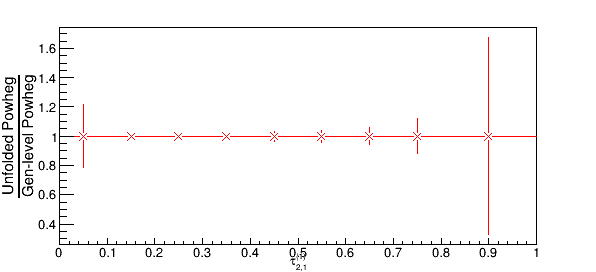

In [140]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("MC_SC_ratio_Escheme_bkgsub.pdf")

In [141]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau21(unfold,staterr)",";tau21(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau21(unfold,totalerr)",";tau21(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau21(gen);tau21(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding stat error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding total error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tau21(unfold,staterr) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tau21(unfold,totalerr) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Corr(total) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bkg_all (Potential memory leak).


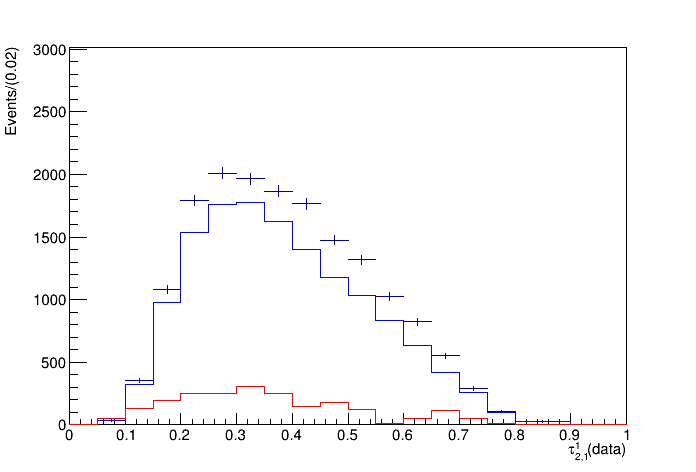

In [142]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

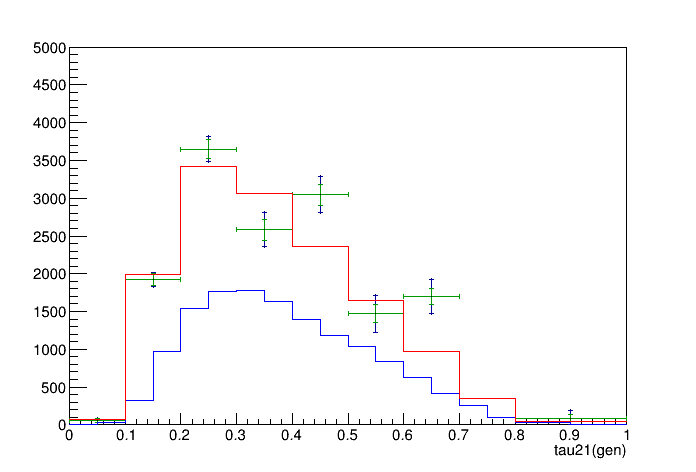

In [143]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(5000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

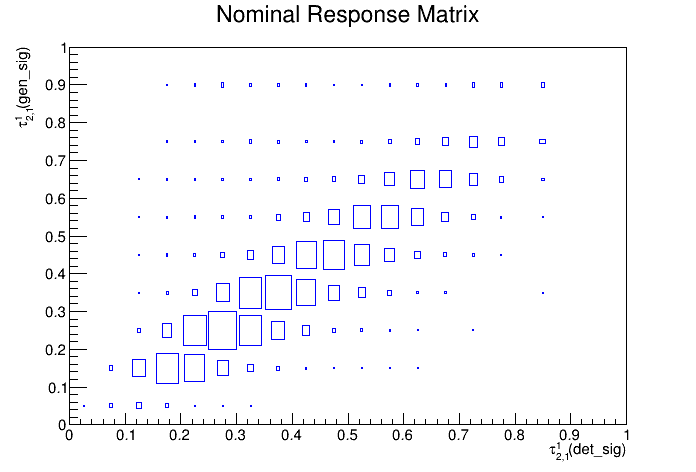

In [144]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

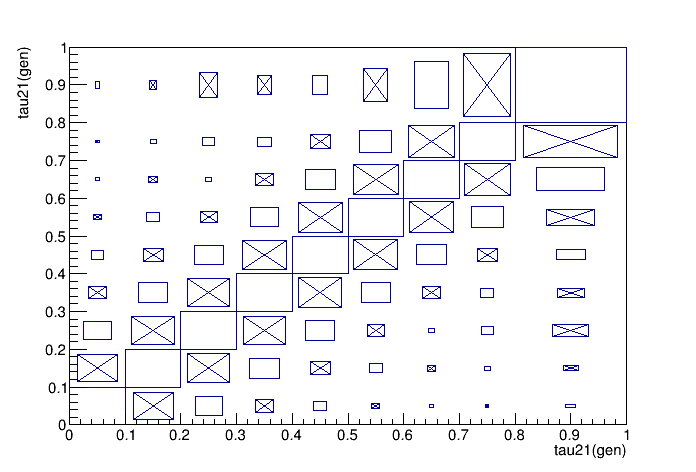

In [145]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()